In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.listdir()

['1000_FB_sub_success_percent_without_original_approach.png',
 'Ordering_L_M',
 '1000_FB_sub_success_percent_with_original_approach.png',
 '1000_YH1_sub_matching_logic_operation_count_with_original_approach.png',
 '10000_YH2_sub_avg_workers_searched_per_task_count_with_original_approach.png',
 '10000_YH2_sub_matching_logic_operation_count_without_original_approach.png',
 '1000_FB_sub_avg_workers_searched_per_task_count_with_original_approach.png',
 '1000_YH1_sub_matching_logic_operation_count_without_original_approach.png',
 '1000_YH1_sub_avg_workers_searched_per_task_count_without_original_approach.png',
 '10000_FB_sub_matching_logic_operation_count_with_original_approach.png',
 '1000_YH2_sub_avg_workers_searched_per_task_count_without_original_approach.png',
 '10000_FB_sub_success_percent_without_original_approach.png',
 '10000_YH2_sub_matching_logic_operation_count_with_original_approach.png',
 '1000_FB_sub_matching_logic_operation_count_without_original_approach.png',
 'README.md',

In [3]:
MATCHING_LOGIC_TECHNIQUES = ['Original',
                             'Separation',
                             'Ordering_L_M',
                             'Ordering_M_L',
                             'Ordering_L_L',
                             'Ordering_M_M']

In [4]:
assert all(map(lambda name: name in os.listdir(), MATCHING_LOGIC_TECHNIQUES)),\
       "Folders not found in current location!"

In [5]:
def create_path_to_log_files(matching_logic_technique):
    return Path(matching_logic_technique) / Path("logs")

# Example function usage
create_path_to_log_files(MATCHING_LOGIC_TECHNIQUES[0])

PosixPath('Original/logs')

---

In [6]:
def get_trace_file_name(fHandler):
    return fHandler.readline().strip().split()[-1]

In [7]:
class LogRecord:
    TRACE_NAME_IND = 0
    GM_COUNT_IND = 1
    LM_COUNT_IND = 2
    PARTITION_SIZE_IND = 3
    MATCHING_LOGIC_OPERATION_COUNT_IND = 29
    SUCCESS_PERCENT_IND = 30
    AVG_WORKERS_SEARCHED_PER_TASK_COUNT_IND = 31

    LAST_TERM_IND = -1
    
    def __init__(self, file_data):
        self.file_data = file_data.split('\n')
        print(self.file_data)

    def __extract_int(self, line_index, term_index):
        print(self.file_data[line_index])
        return int(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_float(self, line_index, term_index):
        print(self.file_data[line_index])
        return float(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_str(self, line_index, term_index):
        print(self.file_data[line_index])
        return str(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_success_percent(self, line_index, term_index):
        return float(self.file_data[line_index].strip().split()[term_index].split('=')[-1].rstrip('%'))
    
    def get_gm_count(self):
        return self.__extract_int(LogRecord.GM_COUNT_IND, self.LAST_TERM_IND)

    def get_lm_count(self):
        return self.__extract_int(LogRecord.LM_COUNT_IND, self.LAST_TERM_IND)

    def get_partition_size(self):
        return self.__extract_int(LogRecord.PARTITION_SIZE_IND, self.LAST_TERM_IND)
 
    def get_matching_logic_operation_count(self):
        return self.__extract_int(LogRecord.MATCHING_LOGIC_OPERATION_COUNT_IND, self.LAST_TERM_IND)

    def get_avg_workers_searched_per_task_count(self):
        return self.__extract_float(LogRecord.AVG_WORKERS_SEARCHED_PER_TASK_COUNT_IND, self.LAST_TERM_IND)

    def get_trace_file_name(self):
        return self.__extract_str(LogRecord.TRACE_NAME_IND, self.LAST_TERM_IND)

    def get_success_percent(self):
        return self.__extract_success_percent(LogRecord.SUCCESS_PERCENT_IND, LogRecord.LAST_TERM_IND)

In [8]:
def fill_data(matching_logic_dict, fHandler):
    obj = LogRecord(fHandler.read())
    
    trace_file_name = obj.get_trace_file_name()
    lm_count = obj.get_lm_count()
    gm_count = obj.get_gm_count()
    partition_size = obj.get_partition_size()
    matching_logic_operation_count = obj.get_matching_logic_operation_count()
    avg_workers_searched_per_task_count = obj.get_avg_workers_searched_per_task_count()
    success_percent = obj.get_success_percent()
    
    cluster_size = gm_count * lm_count * partition_size
    
    matching_logic_dict[cluster_size][trace_file_name] = \
                                    {"gm_count": gm_count,
                                     "lm_count": lm_count,
                                     "partition_size": partition_size,
                                     "cluster_size": cluster_size,
                                     "trace_file_name": trace_file_name,
                                     "matching_logic_operation_count": matching_logic_operation_count,
                                     "avg_workers_searched_per_task_count": avg_workers_searched_per_task_count,
                                     "success_percent": success_percent}


In [9]:
matching_logic_data = dict()

In [10]:
for matching_logic in MATCHING_LOGIC_TECHNIQUES:
    log_file_list = os.listdir(create_path_to_log_files(matching_logic))
    matching_logic_data[matching_logic] = {1000: dict(), 10000: dict()}

    path_to_log_file = create_path_to_log_files(matching_logic)
    for log_file_name in filter(lambda name: os.path.isfile(path_to_log_file / Path(name)), log_file_list):
        with open(path_to_log_file / Path(log_file_name)) as fHandler:
            fill_data(matching_logic_data[matching_logic], fHandler)

['Analysing logs for trace file: YH2_sub', 'Number of GMs: 10', 'Number of LMs: 10', 'Number of Partition Size: 100', 'Simulator Info , Received CMD line arguments.', 'Simulator Info , Simulation running', 'Simulation ended in 2536.9195635318756 s ', 'Simulator Info , Number of Jobs completed: 3363', '', '', '--------------------------------------------------------------------------------', '', '\x1binternal_matching_logic_op\x1b : 39335858', '\x1bexternal_matching_logic_op\x1b : 451112033', '\x1btask_end_event\x1b : 137029', '\x1blaunch_on_node_event\x1b : 137029', '\x1binternal_inconsistency_event\x1b : 5894', '\x1bexternal_inconsistency_event\x1b : 25567', '\x1bmatch_found_event\x1b : 168490', '\x1bperiodic_lm_update_event\x1b : 1446', '\x1baperiodic_lm_update_event\x1b : 168490', '\x1bjob_arrival_event\x1b : 3363', '\x1bcluster_saturated_event\x1b : 25485', '', '', '--------------------------------------------------------------------------------', '', 'Derived attributes:', '\x1bTo

In [11]:
matching_logic_data

{'Original': {1000: {'FB_sub': {'gm_count': 10,
    'lm_count': 10,
    'partition_size': 10,
    'cluster_size': 1000,
    'trace_file_name': 'FB_sub',
    'matching_logic_operation_count': 5095844487,
    'avg_workers_searched_per_task_count': 1544.4241546701921,
    'success_percent': 0.085927},
   'YH1_sub': {'gm_count': 10,
    'lm_count': 10,
    'partition_size': 10,
    'cluster_size': 1000,
    'trace_file_name': 'YH1_sub',
    'matching_logic_operation_count': 225525037,
    'avg_workers_searched_per_task_count': 1835.3573218965153,
    'success_percent': 0.197244},
   'YH2_sub': {'gm_count': 10,
    'lm_count': 10,
    'partition_size': 10,
    'cluster_size': 1000,
    'trace_file_name': 'YH2_sub',
    'matching_logic_operation_count': 255778027,
    'avg_workers_searched_per_task_count': 1866.597778572419,
    'success_percent': 0.146968}},
  10000: {'YH2_sub': {'gm_count': 10,
    'lm_count': 10,
    'partition_size': 100,
    'cluster_size': 10000,
    'trace_file_name':

---

In [12]:
class MarkDown:
    @staticmethod
    def h1(text):
        return f"# {text}\n"
    
    @staticmethod
    def image(url):
        return f"![{url}]({url})\n"
    
    @staticmethod
    def bulletPoint(text):
        return f"- {text}\n"
    
    @staticmethod
    def bold(text):
        return f"**{text}**"

In [13]:
class Comparison:
    # Parameters
    AVG_WORKERS_SEARCHED_PER_TASK_COUNT = 0
    MATCHING_LOGIC_OPERATION_COUNT = 1
    SUCCESS_PERCENT = 2

    # Cluster Size
    TEN_THOUSAND_NODE_CLUSTER_SIZE = 10000
    THOUDSAND_NODE_CLUSTER_SIZE = 1000

    # Cluster Traces
    FB_SUB = 0
    YH1_SUB = 1
    YH2_SUB = 2
    
    MATCHING_LOGIC_ORDER = MATCHING_LOGIC_TECHNIQUES
    CLUSTER_TRACE_NAMES = {
        FB_SUB: 'FB_sub',
        YH1_SUB: 'YH1_sub',
        YH2_SUB: 'YH2_sub'
    }

    PARAMETERS = {
        AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 'avg_workers_searched_per_task_count',
        MATCHING_LOGIC_OPERATION_COUNT: 'matching_logic_operation_count',
        SUCCESS_PERCENT: 'success_percent'
    }

    AXIS_NAME = {
        AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 'Average Number of Workers searched per Task',
        MATCHING_LOGIC_OPERATION_COUNT: 'Number of Matching Logic Operations Performed',
        SUCCESS_PERCENT: 'Success Percent (Values are given in %)'
    }
    
    README_PARAMETER_NAME = {
        AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 'Average Number of Workers searched per Task.',
        MATCHING_LOGIC_OPERATION_COUNT: 'Number of Matching Logic Operations Performed.',
        SUCCESS_PERCENT: 'Success Percent (Values are given in %) - Measures how successful a'
                         ' matching logic approach is in finding a free worker node, while maintaining'
                         ' the least number of failed matches (i.e. trying to match an "actually" busy node).'
    }

    STEP_VALUE_WITH_ORIGINAL_APPROACH = {
        FB_SUB: {
            THOUDSAND_NODE_CLUSTER_SIZE: {
                AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 100,  # TUNED
                MATCHING_LOGIC_OPERATION_COUNT: 200_000_000,  # TUNED
                SUCCESS_PERCENT: 5  # TUNED
            },
            TEN_THOUSAND_NODE_CLUSTER_SIZE: {
                AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 1000,  # TUNED
                MATCHING_LOGIC_OPERATION_COUNT: 2_500_000_000,  # TUNED
                SUCCESS_PERCENT: 5  # TUNED
            }
        },
        YH1_SUB: {
            THOUDSAND_NODE_CLUSTER_SIZE: {
                AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 100,  # TUNED
                MATCHING_LOGIC_OPERATION_COUNT: 10_000_000,  # TUNED
                SUCCESS_PERCENT: 5  # TUNED
            },
            TEN_THOUSAND_NODE_CLUSTER_SIZE: {
                AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 100,  # TUNED
                MATCHING_LOGIC_OPERATION_COUNT: 10_000_000,  # TUNED
                SUCCESS_PERCENT: 5  # TUNED
            }
        },
        YH2_SUB: {
            THOUDSAND_NODE_CLUSTER_SIZE: {
                AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 100,  # TUNED
                MATCHING_LOGIC_OPERATION_COUNT: 10_000_000,  # TUNED
                SUCCESS_PERCENT: 5  # TUNED
            },
            TEN_THOUSAND_NODE_CLUSTER_SIZE: {
                AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 150,  # TUNED
                MATCHING_LOGIC_OPERATION_COUNT: 20_000_000,  # TUNED
                SUCCESS_PERCENT: 5  # TUNED
            }
        }
    }

    STEP_VALUE_WITHOUT_ORIGINAL_APPROACH = {
        FB_SUB: {
            THOUDSAND_NODE_CLUSTER_SIZE: {
                AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 0.1,  # TUNED
                MATCHING_LOGIC_OPERATION_COUNT: 150_000,  # TUNED
                SUCCESS_PERCENT: 5  # TUNED
            },
            TEN_THOUSAND_NODE_CLUSTER_SIZE: {
                AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 0.2,  # TUNED
                MATCHING_LOGIC_OPERATION_COUNT: 500_000,  # TUNED
                SUCCESS_PERCENT: 5  # TUNED
            }
            
        },
        YH1_SUB: {
            THOUDSAND_NODE_CLUSTER_SIZE: {
                AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 0.1,  # TUNED
                MATCHING_LOGIC_OPERATION_COUNT: 10_000,  # TUNED
                SUCCESS_PERCENT: 5  # TUNED
            },
            TEN_THOUSAND_NODE_CLUSTER_SIZE: {
                AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 0.1,  # TUNED
                MATCHING_LOGIC_OPERATION_COUNT: 150_000,  # TUNED
                SUCCESS_PERCENT: 5  # TUNED
            }
            
        },
        YH2_SUB: {
            THOUDSAND_NODE_CLUSTER_SIZE: {
                AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 0.1,  # TUNED
                MATCHING_LOGIC_OPERATION_COUNT: 10_000,  # TUNED
                SUCCESS_PERCENT: 5  # TUNED
            },
            TEN_THOUSAND_NODE_CLUSTER_SIZE: {
                AVG_WORKERS_SEARCHED_PER_TASK_COUNT: 0.1,  # TUNED
                MATCHING_LOGIC_OPERATION_COUNT: 150_000,  # TUNED
                SUCCESS_PERCENT: 5  # TUNED
            }
        }
    }
    
    START_INDEX_WITHOUT_ORIGINAL_APPROACH = 1
    
    # ---

    def __init__(self, matching_logic_data, cluster_size, cluster_trace_name, parameter):
        assert cluster_size in [Comparison.TEN_THOUSAND_NODE_CLUSTER_SIZE,
                                Comparison.THOUDSAND_NODE_CLUSTER_SIZE]
        assert parameter in Comparison.PARAMETERS.keys()
        assert cluster_trace_name in Comparison.CLUSTER_TRACE_NAMES.keys()

        self.parameter = parameter
        self.cluster_size = cluster_size
        self.cluster_trace_name = cluster_trace_name
        self.data = list()
        
        for matching_logic_approach in Comparison.MATCHING_LOGIC_ORDER:
            self.data.append(matching_logic_data[matching_logic_approach]
                             [cluster_size]
                             [Comparison.CLUSTER_TRACE_NAMES[cluster_trace_name]]
                             [Comparison.PARAMETERS[parameter]]
                            )

    def __getUpperLimitForYAxes(self, STEP_VALUE, offset=0):
        # We want the upper limit to be included in the range we create, hence the +1
        return max(self.data[offset:]) + STEP_VALUE + (1 if STEP_VALUE > 1 else 0.1)
            
    def displayPlot(self):
        plt.rcdefaults()
        fig, ax = plt.subplots()
        
        label_locations = np.arange(len(MATCHING_LOGIC_TECHNIQUES)) * 4

        ax.bar(label_locations, self.data, align='center')

        ax.set_xticks(label_locations)
        ax.set_xticklabels(MATCHING_LOGIC_TECHNIQUES)

        STEP_VALUE = (Comparison.STEP_VALUE_WITH_ORIGINAL_APPROACH[self.cluster_trace_name]
                      [self.cluster_size][self.parameter])
        ax.set_yticks(np.arange(0, self.__getUpperLimitForYAxes(STEP_VALUE), STEP_VALUE))
        
        ax.set_xlabel('Matching Logic Approach ⟶')
        ax.set_ylabel(f'{Comparison.AXIS_NAME[self.parameter]} ⟶')

        plt.suptitle('Comparison of Various Matching Logic Approaches Using the Paramter: \n'
                     f'{Comparison.AXIS_NAME[self.parameter]}', fontsize=16)
        ax.set_title(f'For the Trace Dataset - {Comparison.CLUSTER_TRACE_NAMES[self.cluster_trace_name]}', pad=20)

        plt.tick_params(axis='both', which='major', labelsize=9)

        plt.grid()
        plt.tight_layout()
        
        return plt

    def displayPlotWithoutOriginalApproach(self):
        plt.rcdefaults()
        fig, ax = plt.subplots()
        
        label_locations = np.arange(len(MATCHING_LOGIC_TECHNIQUES[1:])) * 4

        ax.bar(label_locations, self.data[1:], align='center')

        ax.set_xticks(label_locations)
        ax.set_xticklabels(MATCHING_LOGIC_TECHNIQUES[1:])

        STEP_VALUE = (Comparison.STEP_VALUE_WITHOUT_ORIGINAL_APPROACH[self.cluster_trace_name]
                      [self.cluster_size][self.parameter])
        ax.set_yticks(np.arange(0,
                                self.__getUpperLimitForYAxes(STEP_VALUE,
                                                             offset=Comparison.START_INDEX_WITHOUT_ORIGINAL_APPROACH
                                                            ),
                                STEP_VALUE
                               )
                     )

        ax.set_xlabel('Matching Logic Approach ⟶')
        ax.set_ylabel(f'{Comparison.AXIS_NAME[self.parameter]} ⟶')
        
        plt.suptitle('Comparison of Various Matching Logic Approaches Using the Paramter: \n'
                     f'{Comparison.AXIS_NAME[self.parameter]}', fontsize=16)
        ax.set_title(f'For the Trace Dataset - {Comparison.CLUSTER_TRACE_NAMES[self.cluster_trace_name]}', pad=20)

        plt.tick_params(axis='both', which='major', labelsize=8)

        plt.grid()
        plt.tight_layout()
        
        return plt
    
    def __getFileName(self, withOriginalApproach):
        fileName = (f'{self.cluster_size}_{Comparison.CLUSTER_TRACE_NAMES[self.cluster_trace_name]}_'
                    f'{Comparison.PARAMETERS[self.parameter]}')
        if withOriginalApproach is True:
            fileName += '_with_original_approach'
        else:
            fileName += '_without_original_approach'
        fileName += '.png'

        return fileName
    
    def saveToFile(self, withOriginalApproach=True):
        self.fileName = self.__getFileName(withOriginalApproach)
        print(f'File saved with the name: {self.fileName}')
        
        if withOriginalApproach is True:
            plotObj = self.displayPlot()   
        else:
            plotObj = self.displayPlotWithoutOriginalApproach()

        plotObj.savefig(self.fileName, dpi=300, bbox_inches='tight')
    
    @staticmethod
    def writePlotsToREADME():
        NEWLINE = "\n"
        LINE_SEPARATOR = "\n---\n"

        with open ("README.md", "w") as fHandler:
            fHandler.write(MarkDown.h1("With Original Approach of Round-Robin:"))
            for cluster_trace_name in [Comparison.FB_SUB, Comparison.YH1_SUB, Comparison.YH2_SUB]:
                for cluster_size in [Comparison.THOUDSAND_NODE_CLUSTER_SIZE,
                                     Comparison.TEN_THOUSAND_NODE_CLUSTER_SIZE]:
                    for parameter in [Comparison.AVG_WORKERS_SEARCHED_PER_TASK_COUNT,
                                      Comparison.MATCHING_LOGIC_OPERATION_COUNT,
                                      Comparison.SUCCESS_PERCENT]:
                        obj = Comparison(matching_logic_data, cluster_size, cluster_trace_name, parameter)
                        fHandler.write(MarkDown.bulletPoint(MarkDown.bold("Cluster Size:") + " " +
                                                            f"{cluster_size}"))
                        fHandler.write(MarkDown.
                                       bulletPoint(MarkDown.bold("Cluster Trace Name:") + " " +
                                                   f"{Comparison.CLUSTER_TRACE_NAMES[cluster_trace_name]}"))
                        fHandler.write(MarkDown.bulletPoint(MarkDown.bold("Parameter:") + " " +
                                                            f"{Comparison.README_PARAMETER_NAME[parameter]}"))
                        fHandler.write(NEWLINE)
                        fHandler.write(MarkDown.image(obj.__getFileName(withOriginalApproach=True)))
                        fHandler.write(LINE_SEPARATOR)

            fHandler.write(MarkDown.h1("Without Original Approach of Round-Robin:"))
            for cluster_trace_name in [Comparison.FB_SUB, Comparison.YH1_SUB, Comparison.YH2_SUB]:
                for cluster_size in [Comparison.THOUDSAND_NODE_CLUSTER_SIZE, Comparison.TEN_THOUSAND_NODE_CLUSTER_SIZE]:
                    for parameter in [Comparison.AVG_WORKERS_SEARCHED_PER_TASK_COUNT,
                                      Comparison.MATCHING_LOGIC_OPERATION_COUNT,
                                      Comparison.SUCCESS_PERCENT]:
                        obj = Comparison(matching_logic_data, cluster_size, cluster_trace_name, parameter)
                        fHandler.write(MarkDown.bulletPoint(MarkDown.bold("Cluster Size:") + " " +
                                                            f"{cluster_size}"))
                        fHandler.write(MarkDown.
                                       bulletPoint(MarkDown.bold("Cluster Trace Name:") + " " +
                                                   f"{Comparison.CLUSTER_TRACE_NAMES[cluster_trace_name]}"))
                        fHandler.write(MarkDown.bulletPoint(MarkDown.bold("Parameter:") + " " +
                                                            f"{Comparison.README_PARAMETER_NAME[parameter]}"))
                        fHandler.write(NEWLINE)
                        fHandler.write(MarkDown.image(obj.__getFileName(withOriginalApproach=False)))
                        fHandler.write(LINE_SEPARATOR)

In [14]:
Comparison(matching_logic_data,
           Comparison.TEN_THOUSAND_NODE_CLUSTER_SIZE,
           Comparison.FB_SUB,
           Comparison.MATCHING_LOGIC_OPERATION_COUNT).data

[68206821506, 16003648, 5626331, 16003648, 14088205, 5682716]

<module 'matplotlib.pyplot' from '/home/rishit/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

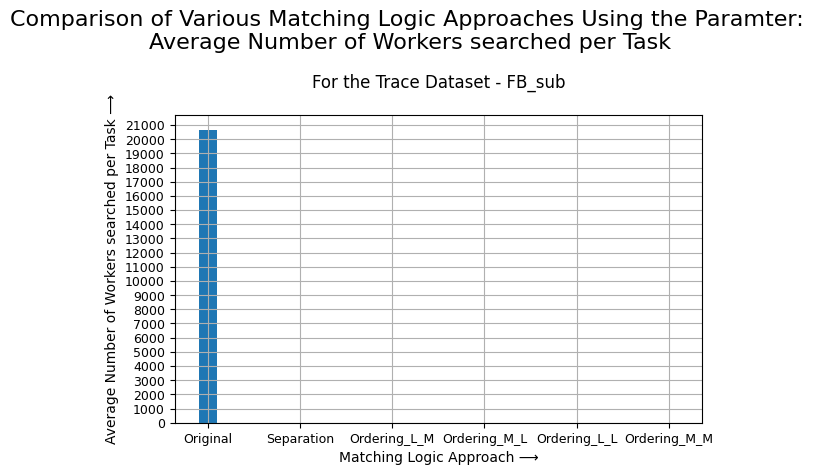

In [15]:
Comparison(matching_logic_data,
           Comparison.TEN_THOUSAND_NODE_CLUSTER_SIZE,
           Comparison.FB_SUB,
           Comparison.AVG_WORKERS_SEARCHED_PER_TASK_COUNT).displayPlot()

<module 'matplotlib.pyplot' from '/home/rishit/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

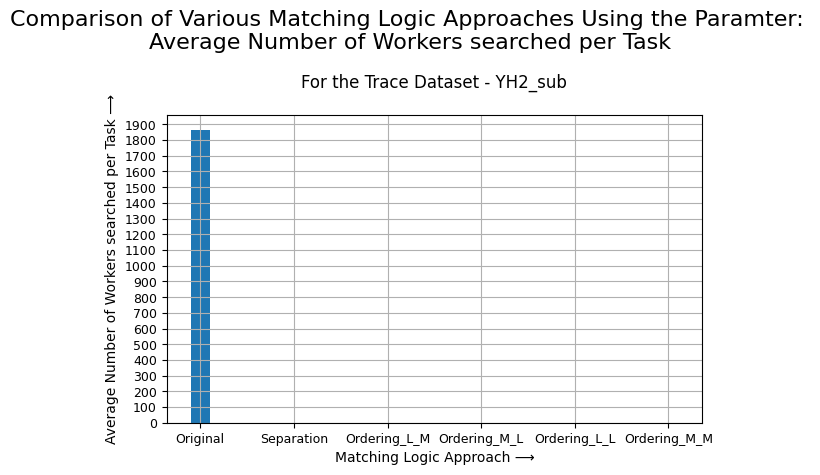

In [17]:
Comparison(matching_logic_data,
           Comparison.THOUDSAND_NODE_CLUSTER_SIZE,
           Comparison.YH2_SUB,
           Comparison.AVG_WORKERS_SEARCHED_PER_TASK_COUNT).displayPlot()

File saved with the name: 1000_FB_sub_matching_logic_operation_count_without_original_approach.png


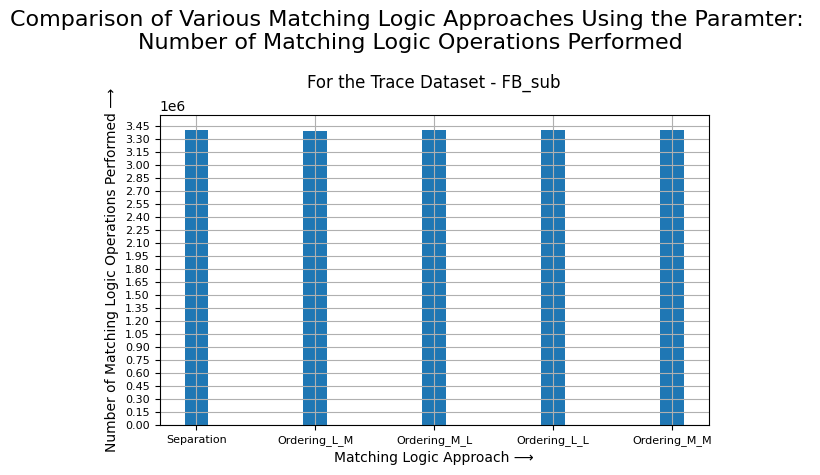

In [17]:
Comparison(matching_logic_data,
           Comparison.THOUDSAND_NODE_CLUSTER_SIZE,
           Comparison.FB_SUB,
           Comparison.MATCHING_LOGIC_OPERATION_COUNT).saveToFile(withOriginalApproach=False)

# Capture the Results in `.png` Files:

`Comparison` class's constructor's signature:
```python
Comparison(self, matching_logic_data, cluster_size, cluster_trace_name, parameter):
```

File saved with the name: 1000_FB_sub_avg_workers_searched_per_task_count_with_original_approach.png
File saved with the name: 1000_FB_sub_avg_workers_searched_per_task_count_without_original_approach.png
File saved with the name: 1000_FB_sub_matching_logic_operation_count_with_original_approach.png
File saved with the name: 1000_FB_sub_matching_logic_operation_count_without_original_approach.png
File saved with the name: 1000_FB_sub_success_percent_with_original_approach.png
File saved with the name: 1000_FB_sub_success_percent_without_original_approach.png
File saved with the name: 10000_FB_sub_avg_workers_searched_per_task_count_with_original_approach.png
File saved with the name: 10000_FB_sub_avg_workers_searched_per_task_count_without_original_approach.png
File saved with the name: 10000_FB_sub_matching_logic_operation_count_with_original_approach.png
File saved with the name: 10000_FB_sub_matching_logic_operation_count_without_original_approach.png
File saved with the name: 10000

<ipython-input-13-4c6adeeabb9b>:151: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


File saved with the name: 10000_YH1_sub_matching_logic_operation_count_without_original_approach.png
File saved with the name: 10000_YH1_sub_success_percent_with_original_approach.png
File saved with the name: 10000_YH1_sub_success_percent_without_original_approach.png
File saved with the name: 1000_YH2_sub_avg_workers_searched_per_task_count_with_original_approach.png
File saved with the name: 1000_YH2_sub_avg_workers_searched_per_task_count_without_original_approach.png
File saved with the name: 1000_YH2_sub_matching_logic_operation_count_with_original_approach.png
File saved with the name: 1000_YH2_sub_matching_logic_operation_count_without_original_approach.png
File saved with the name: 1000_YH2_sub_success_percent_with_original_approach.png
File saved with the name: 1000_YH2_sub_success_percent_without_original_approach.png
File saved with the name: 10000_YH2_sub_avg_workers_searched_per_task_count_with_original_approach.png
File saved with the name: 10000_YH2_sub_avg_workers_sear

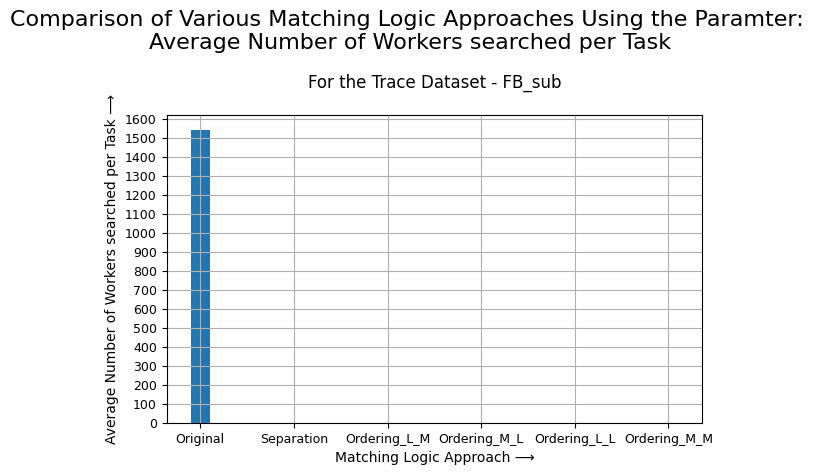

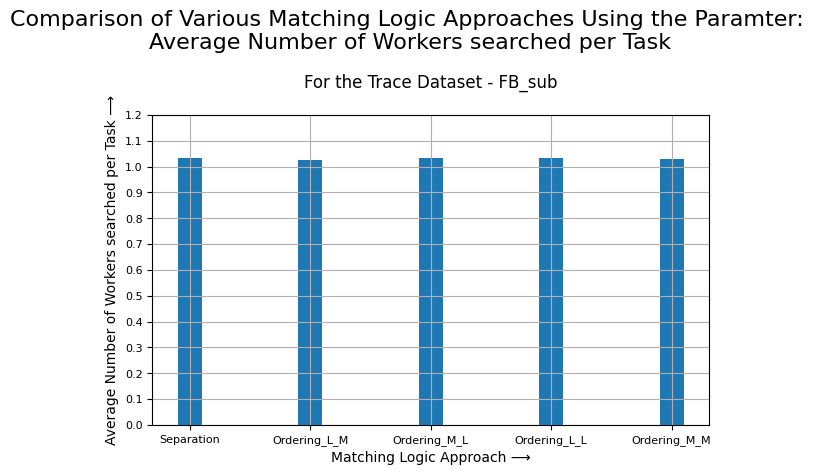

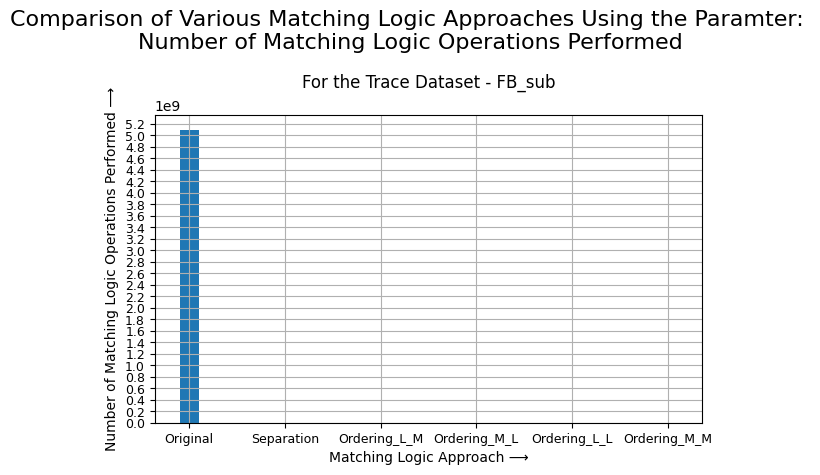

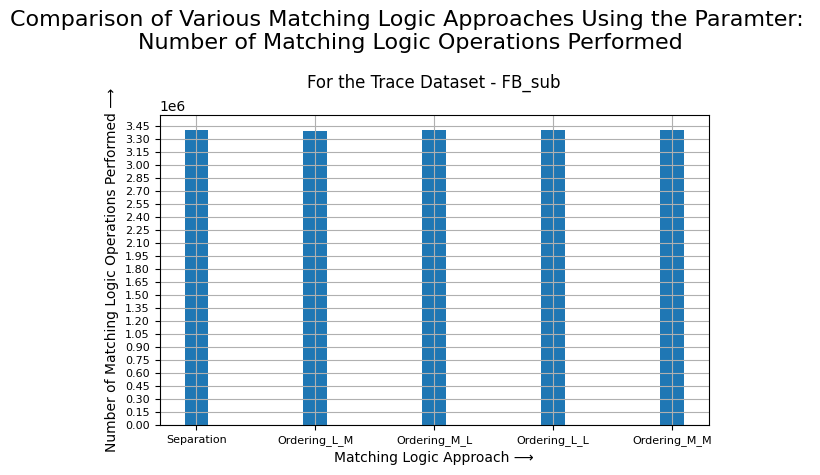

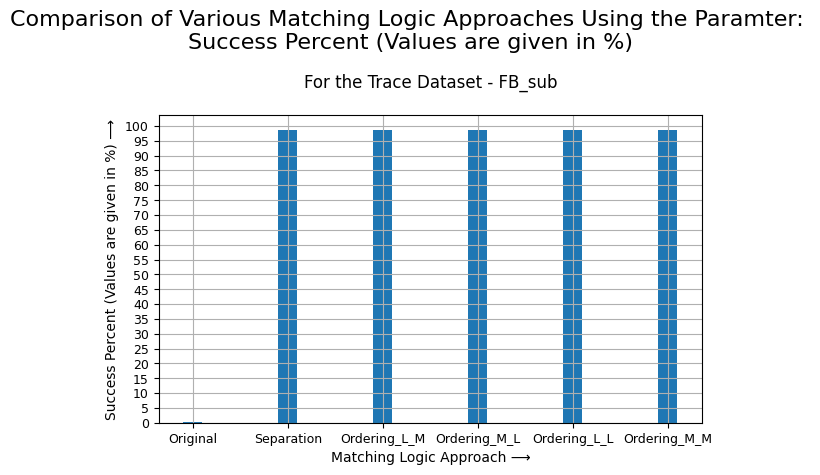

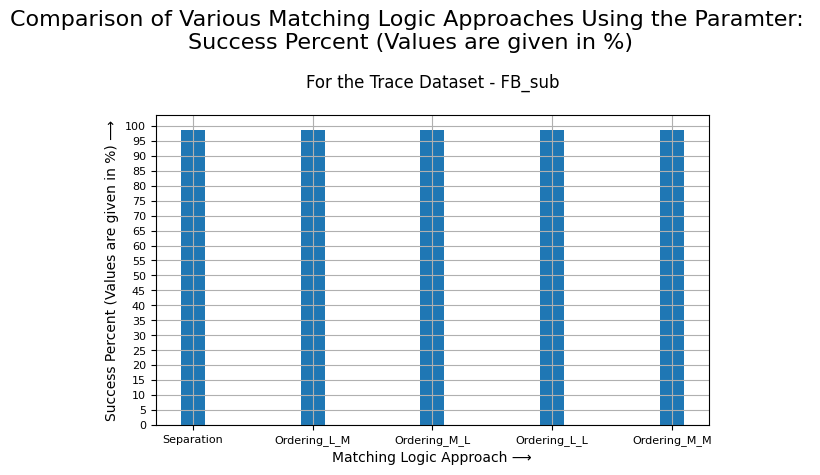

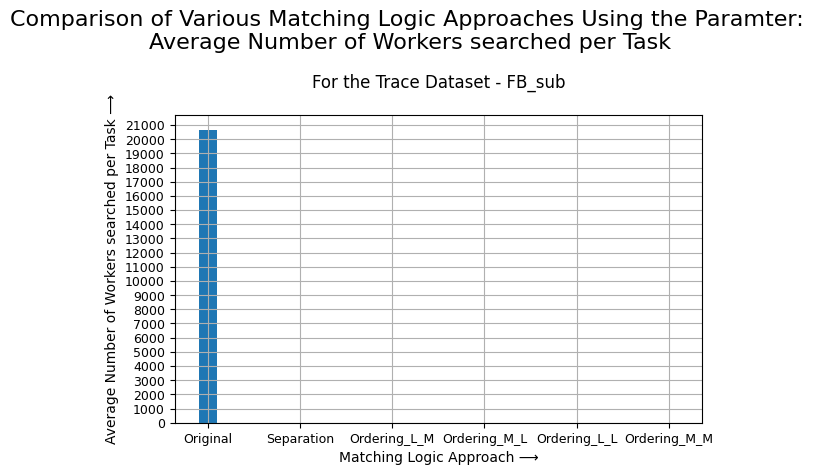

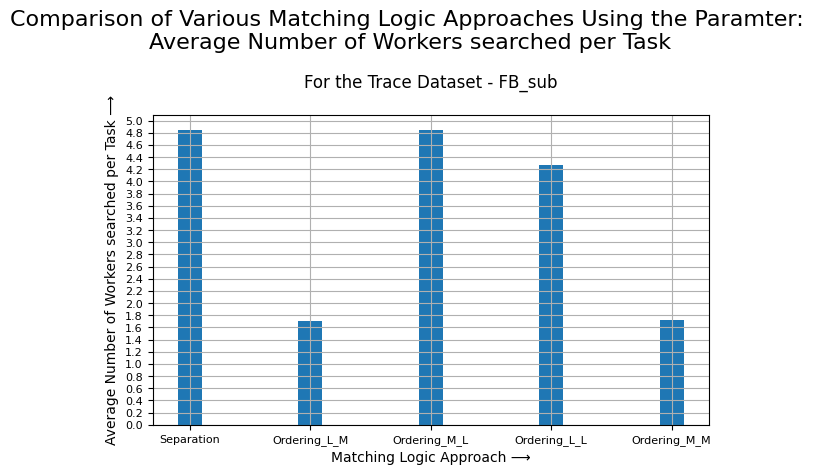

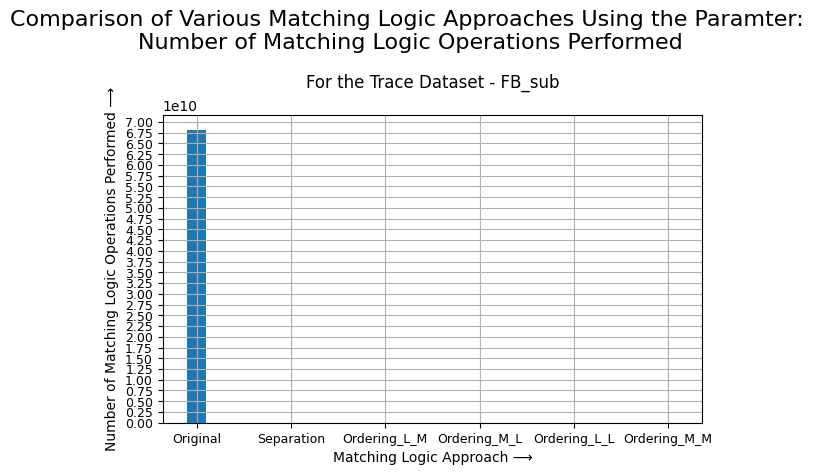

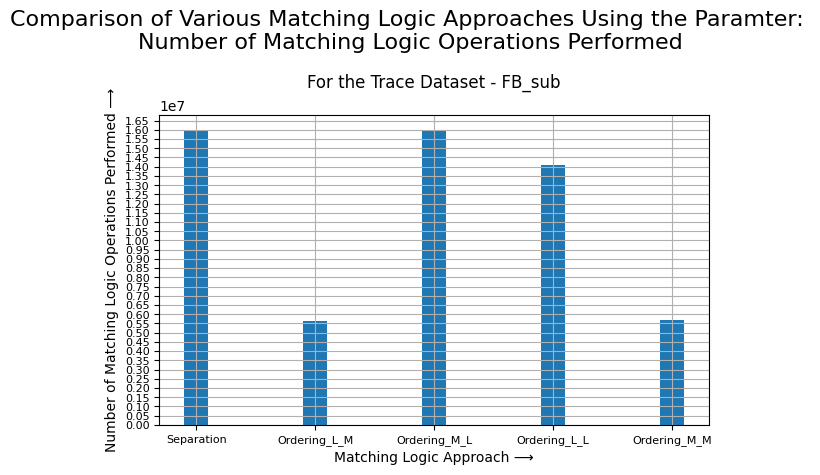

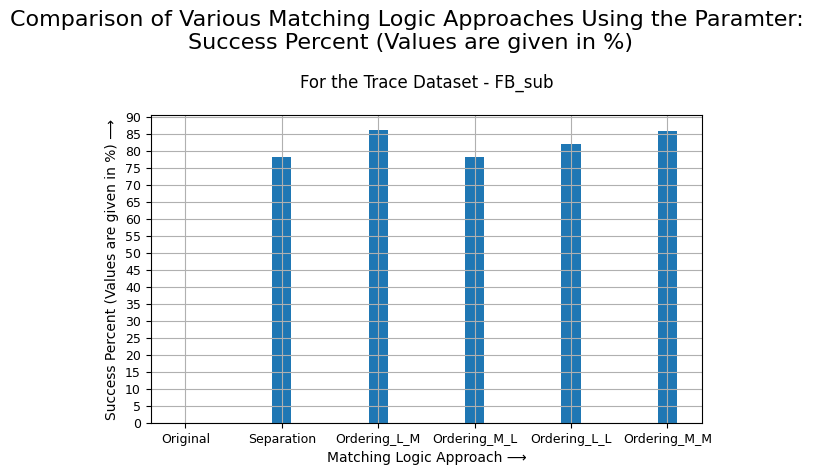

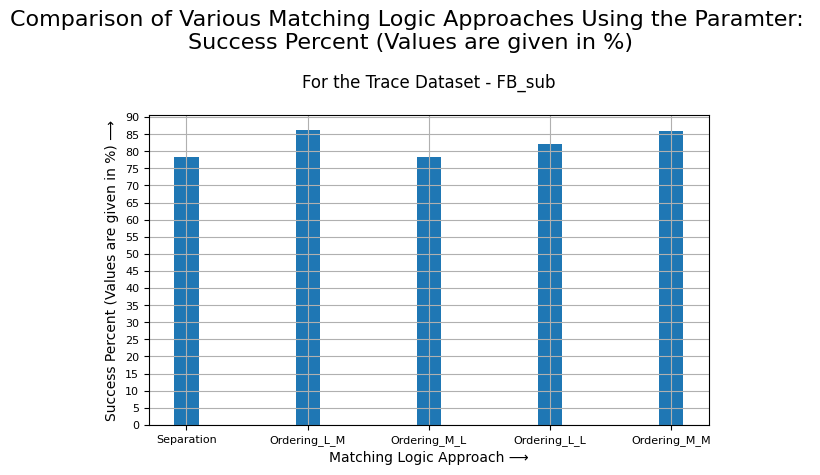

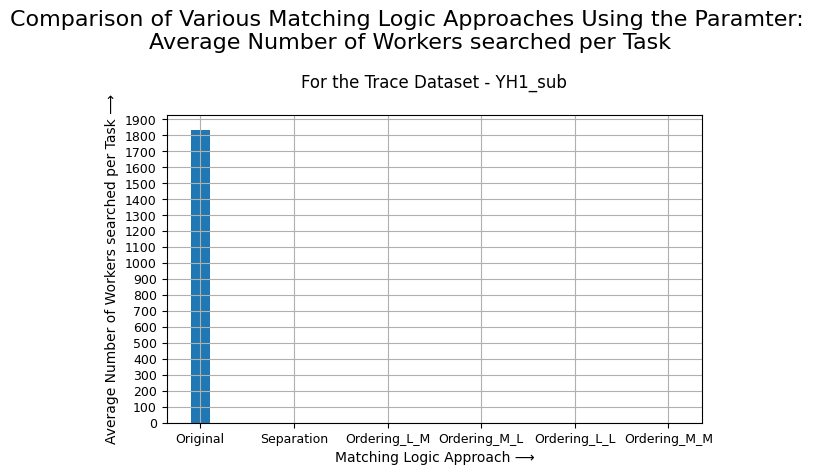

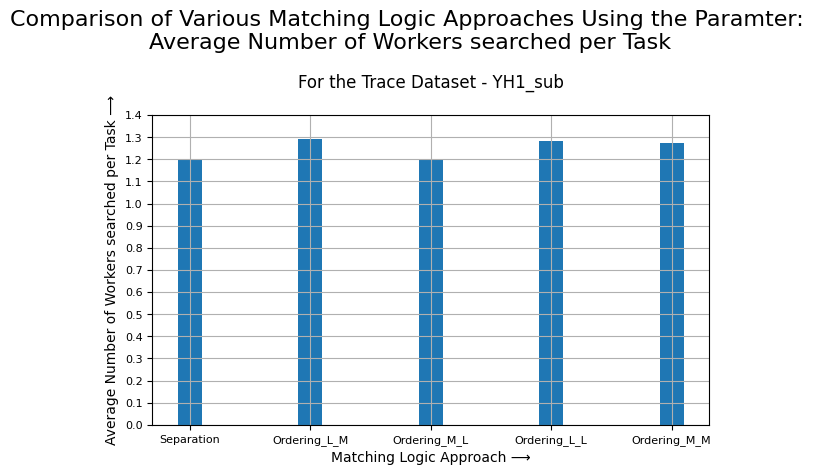

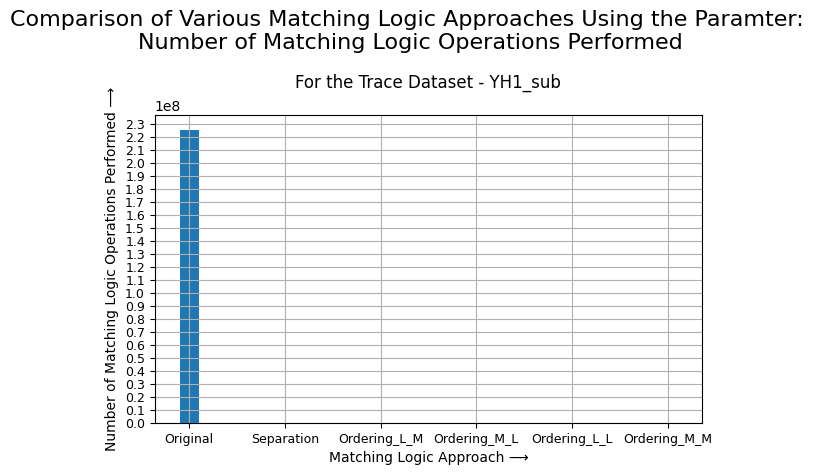

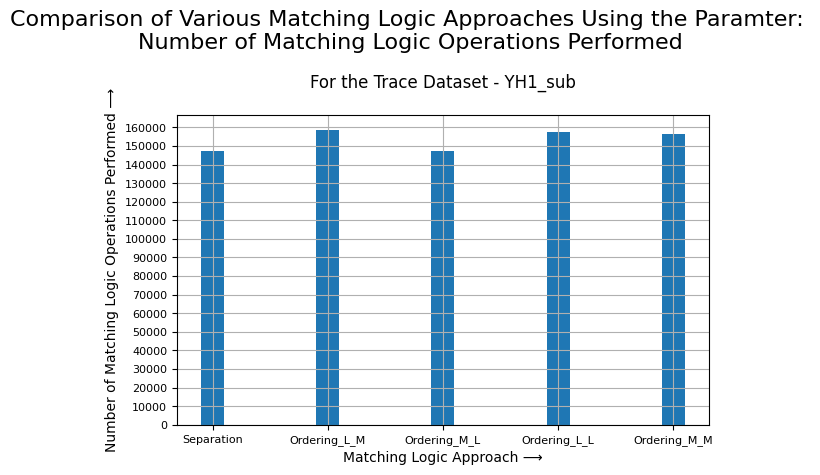

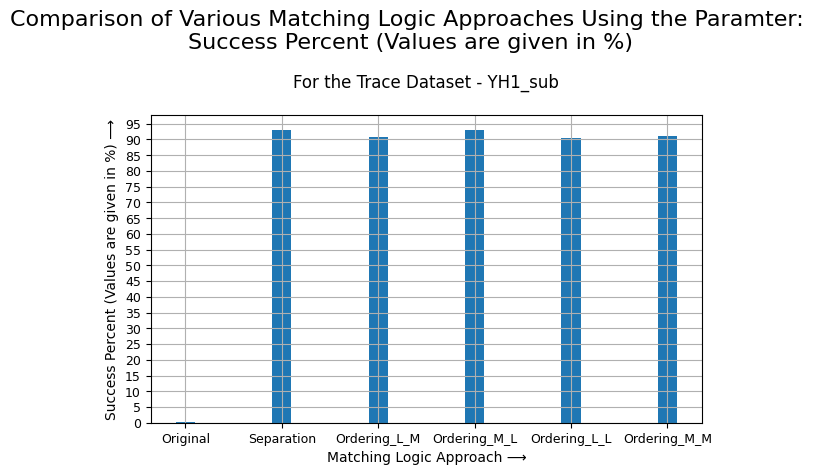

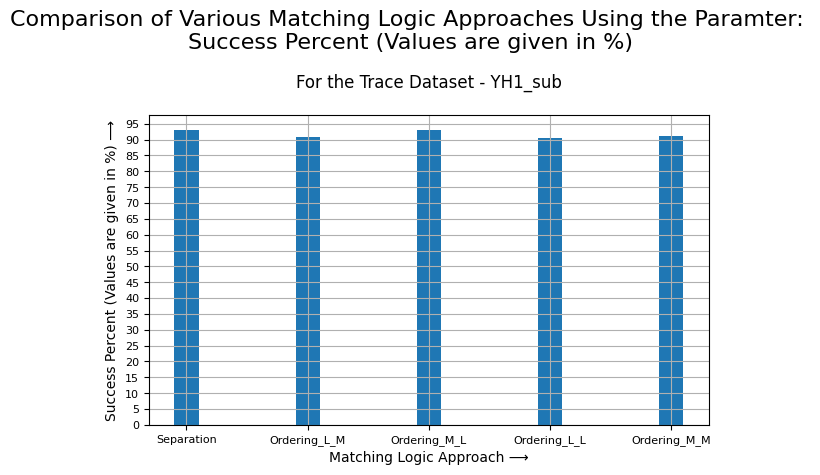

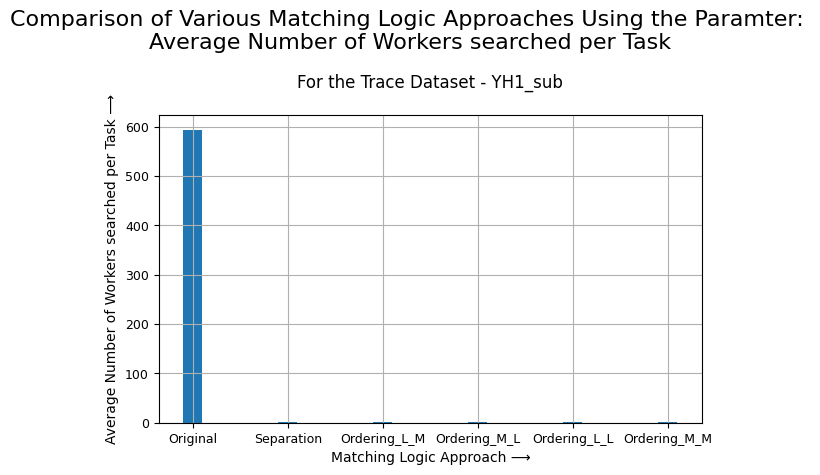

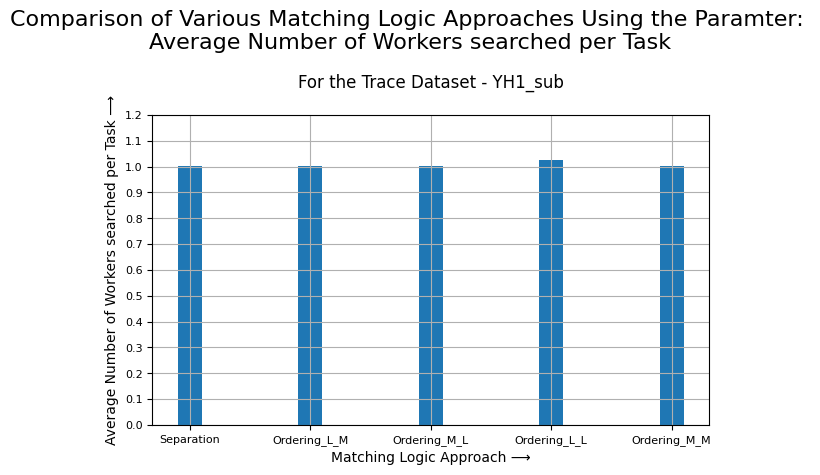

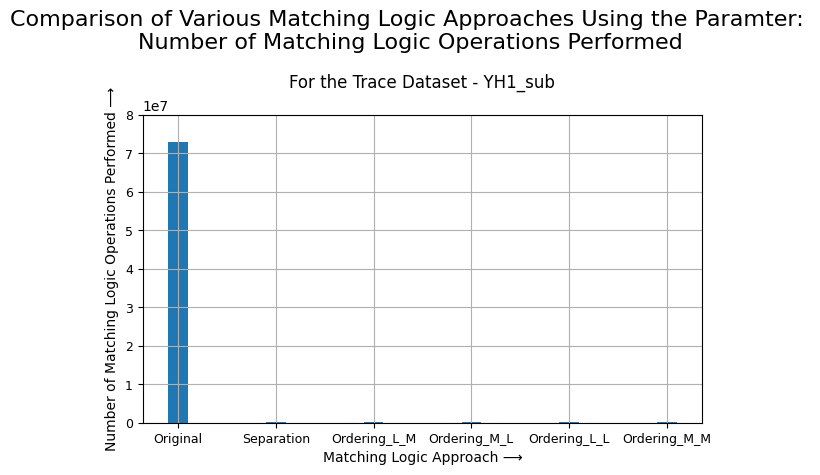

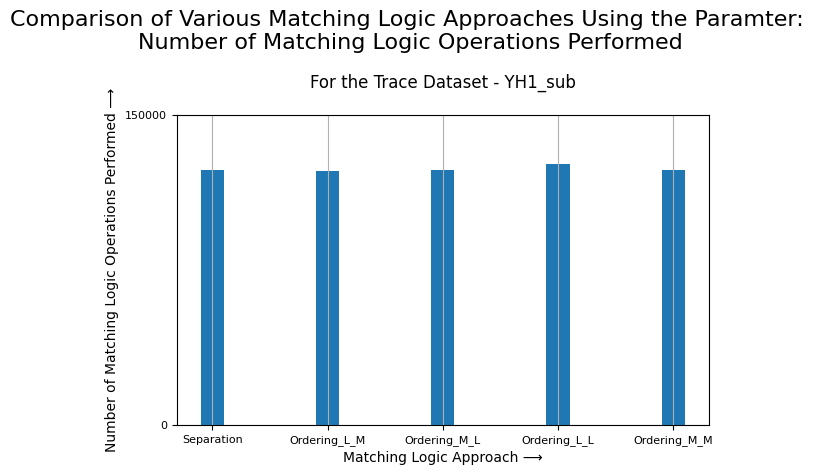

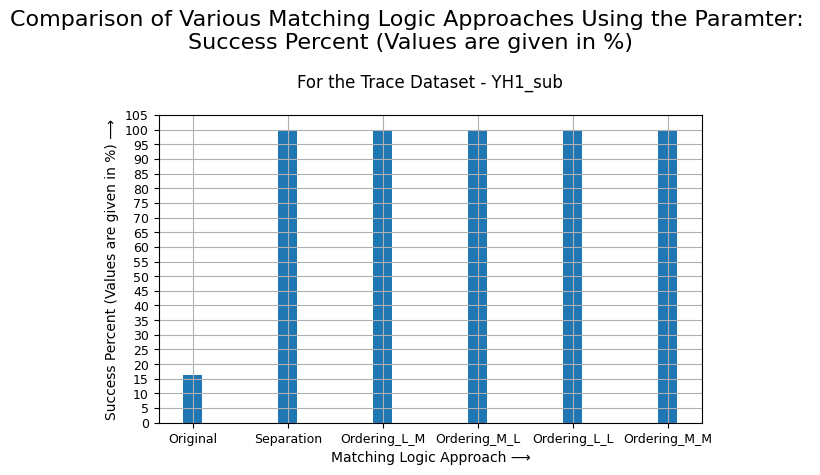

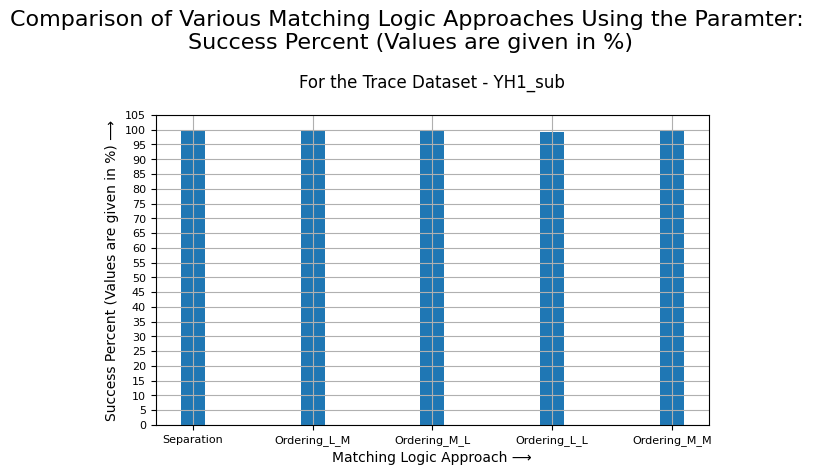

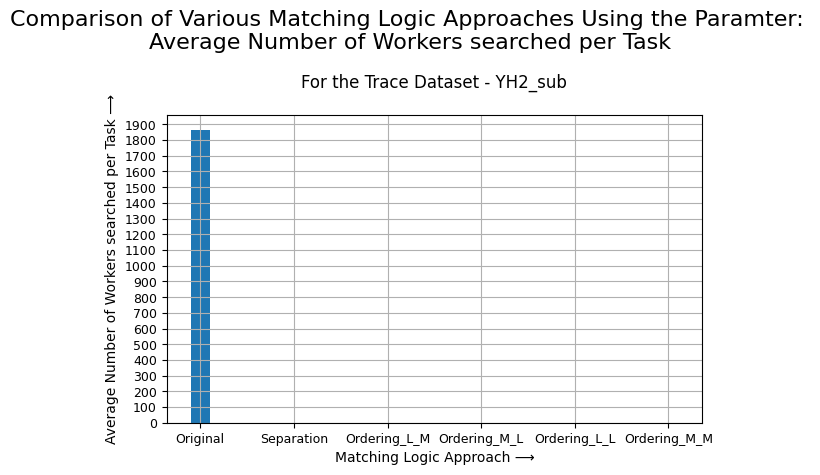

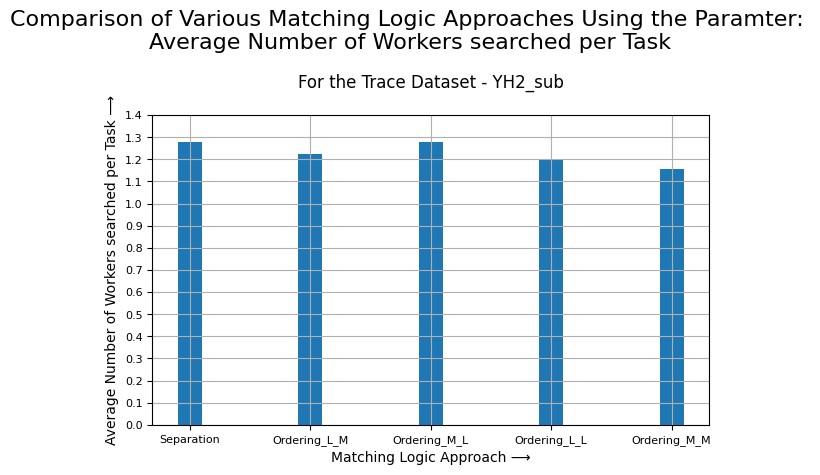

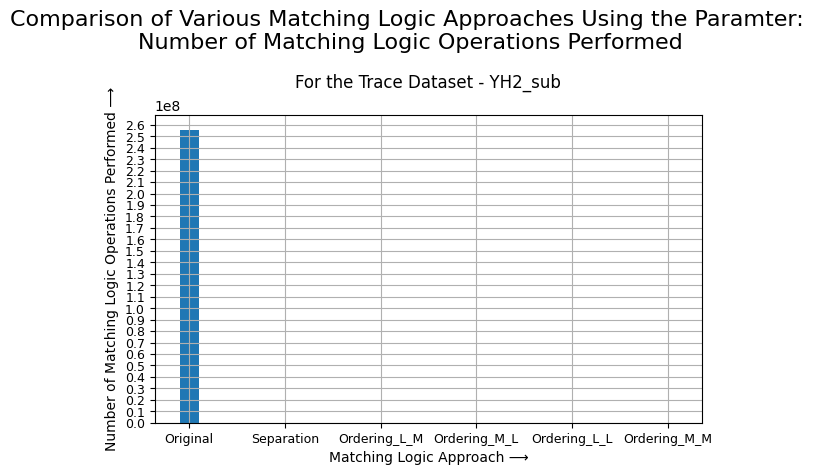

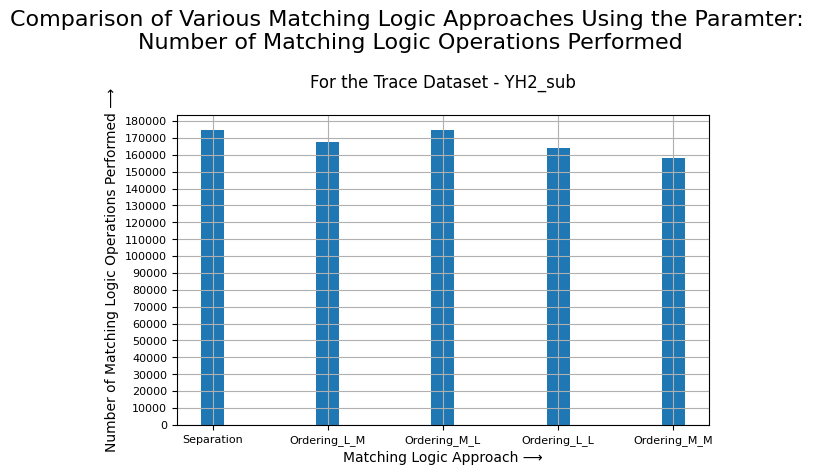

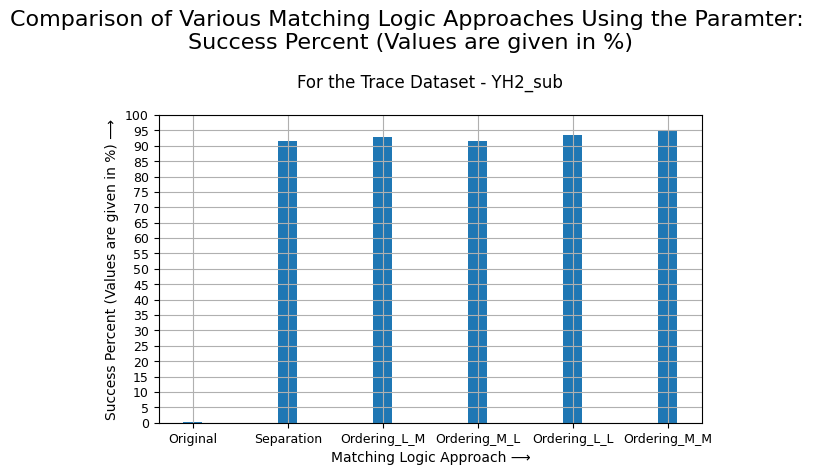

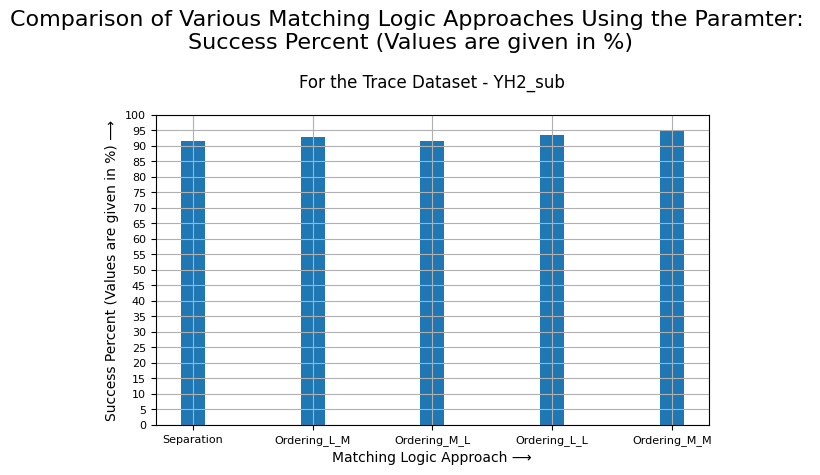

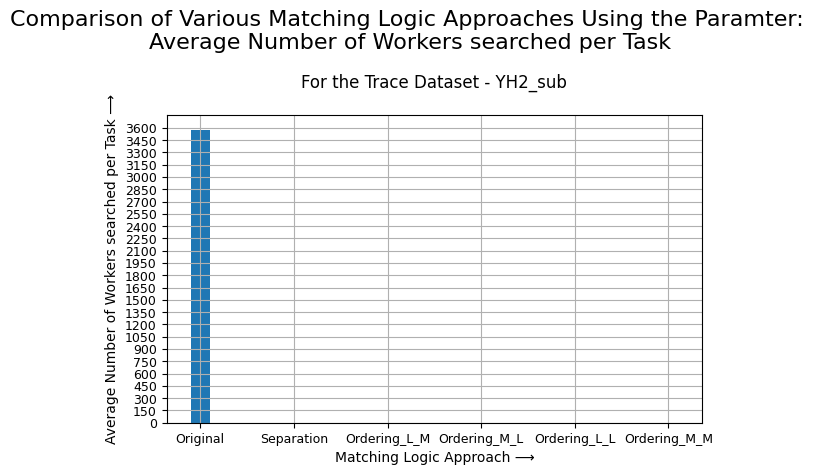

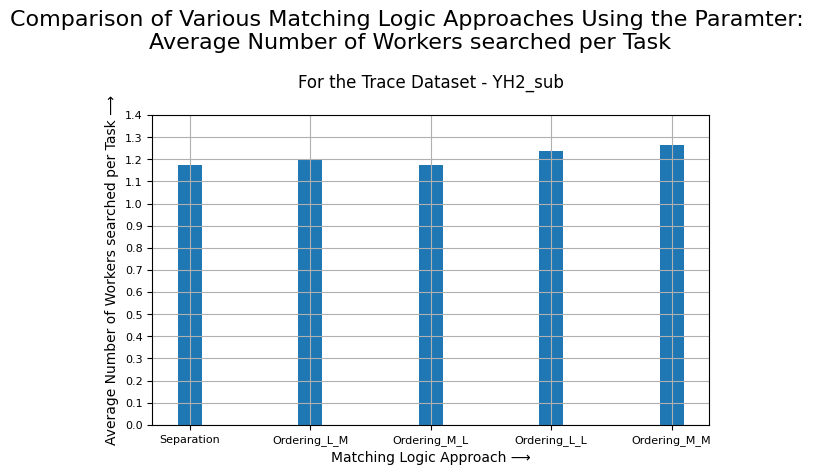

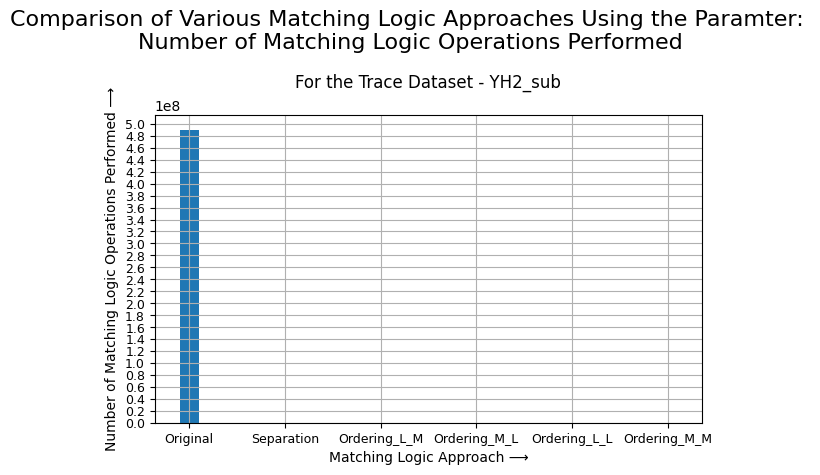

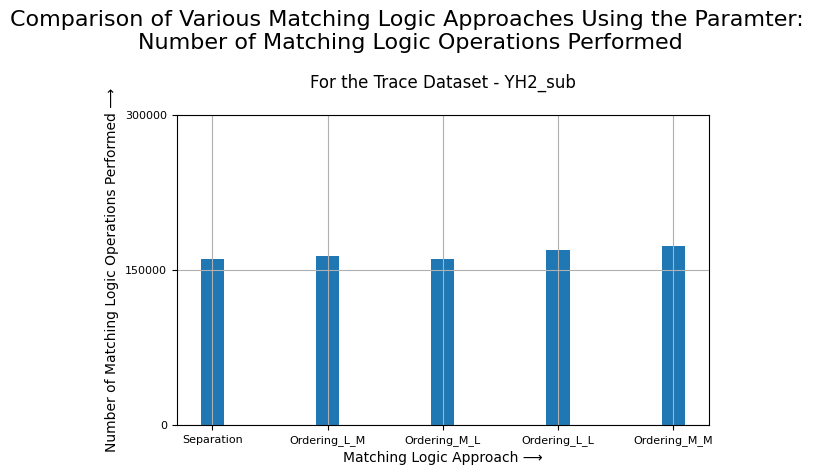

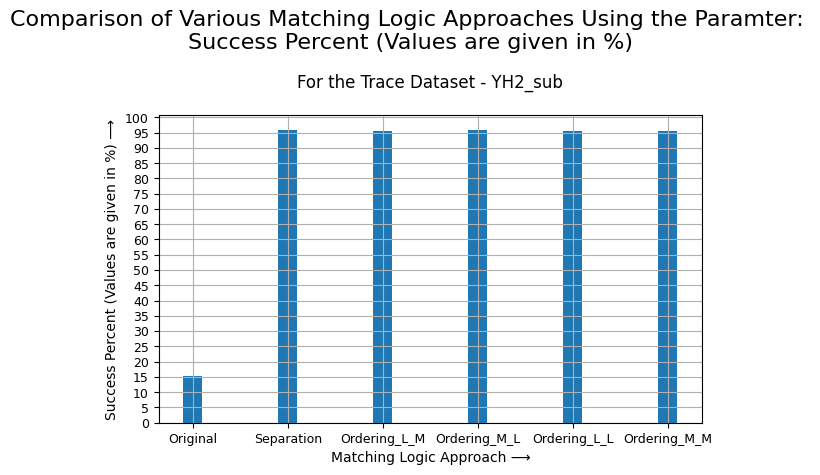

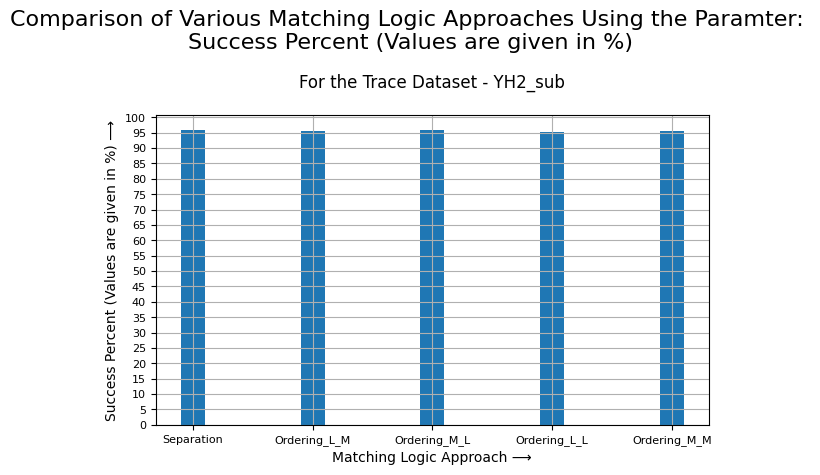

In [18]:
for cluster_trace_name in [Comparison.FB_SUB, Comparison.YH1_SUB, Comparison.YH2_SUB]:
    for cluster_size in [Comparison.THOUDSAND_NODE_CLUSTER_SIZE, Comparison.TEN_THOUSAND_NODE_CLUSTER_SIZE]:
        for parameter in [Comparison.AVG_WORKERS_SEARCHED_PER_TASK_COUNT,
                          Comparison.MATCHING_LOGIC_OPERATION_COUNT,
                          Comparison.SUCCESS_PERCENT]:
            Comparison(matching_logic_data, cluster_size, cluster_trace_name, parameter).\
                saveToFile(withOriginalApproach=True)
            Comparison(matching_logic_data, cluster_size, cluster_trace_name, parameter).\
                saveToFile(withOriginalApproach=False)


In [19]:
Comparison.writePlotsToREADME()